<a href="https://colab.research.google.com/github/heoliveira/ufmg-ibd-tp1/blob/main/%5BUFMG_ICEX%5D_IBD_TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

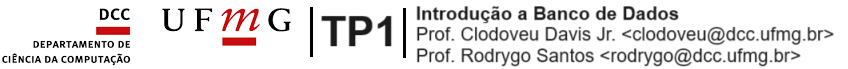

**Orientações de Realização:**


1.   Informe seu número de matrícula, nome completo é a turma (TM ou TZ);

2.   Execute a célula de importação de dados antes de resolver as questões. O tempo de execução pode chegar a  **5 minutos**;

3.   Em caso de erro na importação execute a célula novamente.Persistindo o problema, acionar os monitores da disciplina pelo **moodle** informando a mensagem de erro;

4.   Uma vez importado o banco de dados, leia o **TP1** atentando as instruções designadas a atividade;

5.  Execute as celulas dos itens **3.1** e **3.2**, em seguida selecione o código da questão a realizar conforme regras do enunciado do **TP1**;

6.   Construa seu código **SQL** na célula corresponde a cada questão, atribuindo a variável **`query`**;

7.   Quando tiver finalizado , acesse o moodle e **envie suas respostas para avaliação**.







**Identificação do aluno:**
<br>
<label for="matricula">Matrícula:</label>
  <input type="text" id="matricula" size="10" name="matricula">
  <label for="nome">Nome:</label>
  <input type="text" id="nome" size="80" name="nome">
  <label for="turma">Turma:</label>
  <select id="turma" name="turma">
    <option value="TM">TM</option>
    <option value="TZ">TZ</option>
  </select><br>


##**Importação de banco de dados**


In [ ]:
# @title
!pip -q install multiset
!pip -q install tabulate
from tabulate import tabulate
import sqlite3
import pandas as pd
import io, os
import zipfile
import multiset as ms

# Caminhos dos arquivos e do banco de dados
caminho_do_banco = 'tp_arround.db'
caminho_arquivo_zip = '/tmp/database.zip'
caminho_do_script_sql = '/tmp/database/database.sql'
caminho_do_script_ddl = '/tmp/database/database-ddl.sql'
caminho_do_script_dml = '/tmp/database/database-dml.sql'
query = None
# Excluindo arquivos e banco de dados se existirem
for caminho in [caminho_arquivo_zip, caminho_do_script_sql, caminho_do_script_ddl, caminho_do_script_dml, caminho_do_banco]:
    if os.path.exists(caminho):
        os.remove(caminho)

# Baixando e extraindo o arquivo zip
!wget --quiet -N -P /tmp/ https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/database.zip

with zipfile.ZipFile(caminho_arquivo_zip, 'r') as zip_ref:
    zip_ref.extractall('/tmp/')

# Criando conexão com o banco de dados SQLite
conn = sqlite3.connect(caminho_do_banco)
cursor = conn.cursor()

# Executando o script DDL para criar as tabelas
with open(caminho_do_script_ddl, 'r') as sql_file:
   sql_script = sql_file.read()

cursor.executescript(sql_script)
print("====================================")
print("Banco de dados criado.")
print("Inicializando dump de dados ...")
print("------------------------------------")

# Contando o total de linhas do script DML
total_linhas = 0
with open(caminho_do_script_dml, 'r') as sql_file:
    linhas = sql_file.readlines()
    total_linhas = len(linhas)

percentual = 0
for line_number, line in enumerate(linhas, start=1):
    cursor.execute(line)
    if line_number % 20000 == 0:
        percentual += 20
        print(f"Processado {percentual}% da importação ...") if percentual < 100 else None

print(f"Processado {percentual}% da importação ...")
print("====================================")
print("Importação finalizada !!!")
print("************************************")

conn.commit()


## **Esquema Entidade Relacionamento**
https://dbdiagram.io/d/IBD-TP1-DATASET-AJUSTADO-6629f85103593b6b61ebde44

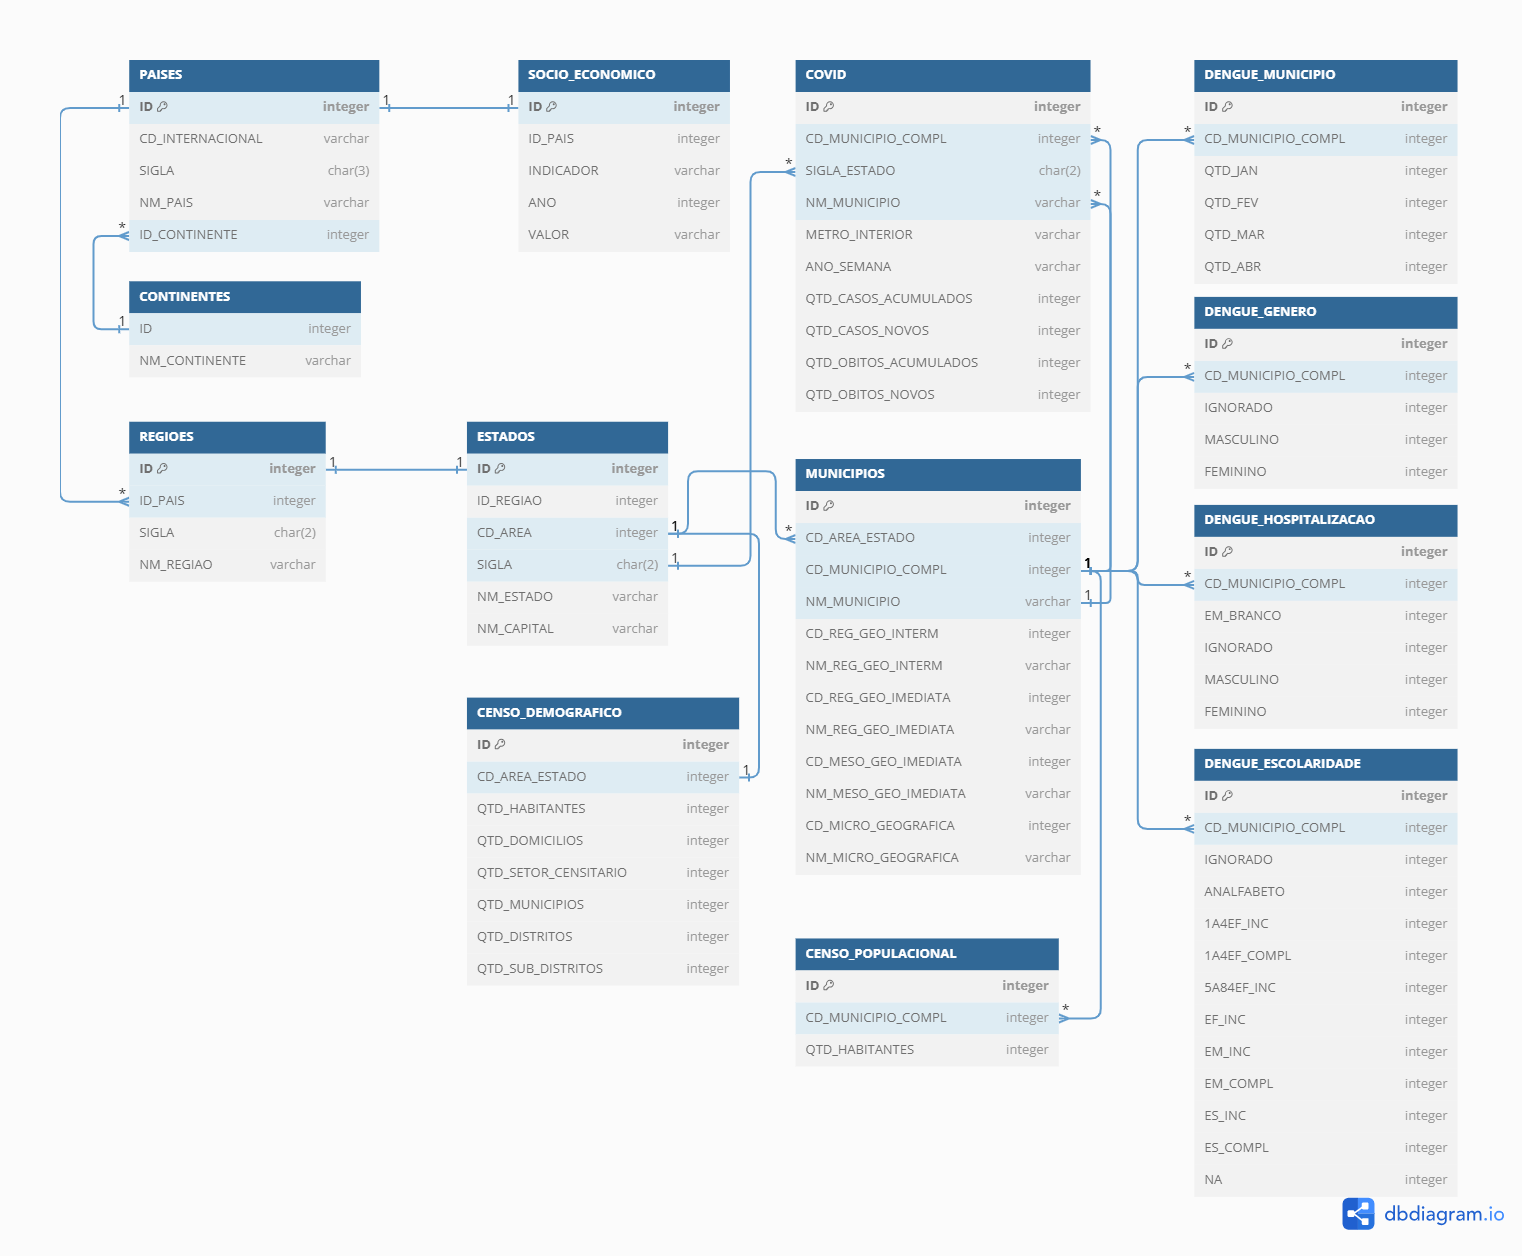

##**3.1 Especificação em Algebra Relacional**

In [33]:
# @title
import ipywidgets as widgets
from IPython.display import display, Image
opt = None
# Dicionário que mapeia cada opção para a URL da imagem correspondente
imagens_questoes = {
    'Selecione': 'Selecione um valor da lista',
    'A0': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A0.png',
    'A1': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A1.png',
    'A2': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A2.png',
    'A3': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A3.png',
    'A4': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A4.png',
    'A5': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A5.png',
    'A6': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A6.png',
    'A7': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A7.png',
    'A8': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A8.png',
    'A9': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A9.png'
}

# Criando o dropdown para seleção da questão
questao_algebra_dropdown = widgets.Dropdown(options=list(imagens_questoes.keys()), description='1 de 5:')

# Função para exibir DataFrame com cabeçalhos negritados
def print_dataframe_with_bold_headers(df, linhas):
    # Formatar cabeçalhos com negrito
    headers = [f"**{col}**" for col in df.columns]



    # Selecionando as 3 primeiras e 3 últimas linhas
    if linhas >= 5:
      first_three = df[:5]
      table = tabulate(first_three, headers=headers, tablefmt='github', showindex=False)
      print(table)
      print("Continua ....")
    else:
      first_three = df[:linhas]

# Função para atualizar a imagem exibida de acordo com a opção selecionada
def update_imagem_questao(change):
    if change.new is not None:
        imagem_url = imagens_questoes.get(change.new)
        imagem_widget = Image(url=imagem_url)
        display(imagem_widget)

# Conectando a função de atualização ao evento de mudança de valor do dropdown
questao_algebra_dropdown.observe(update_imagem_questao, names='value')

# Função que será chamada ao clicar no botão "Avaliar"
def avaliar_questao(b):
    if questao_algebra_dropdown.value == 'Selecione':
      print(f"Selecione uma questão !")
      return

    if os.path.exists("template_sdf.pkl"):
      pass
    else:
      print(f"Antes de avaliar, construa sua query e execute seu código.")
      return

    opt = questao_algebra_dropdown.value
    # Baixando e extraindo o arquivo zip
    !wget --quiet -N -P /tmp/ https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/templates-tp1/{opt}.pkl

    avaliacao = None
    anc       = None
    sdf       = None
    try:
        sdf = pd.read_pickle("template_sdf.pkl")
        snc = sdf.shape[1]
        adf = pd.read_pickle(f"/tmp/{opt}.pkl")
        anc = adf.shape[1]
    except Exception as err:
       print(f"({opt}) Nota:0 - {avaliacao}")
       os.remove("template_sdf.pkl")

    if (anc != snc):
      avaliacao = f'Numero de colunas incorreto: Enviado:{snc} - / Esperado:{anc}'
      print(f"({opt}) Nota:0 - {avaliacao}")
      print(f"({opt}) Resposta esperada:")
      # Chamar a função para exibir o DataFrame
      print_dataframe_with_bold_headers(adf,adf.shape[0])
      os.remove("template_sdf.pkl")
    else:
        try:
            # rename columns to allow merging (assume same order)
            tmp = sdf.columns
            sdf.columns = adf.columns

            # compute jaccard similarity for multisets
            ams = ms.Multiset(adf.groupby(adf.columns.tolist()).size().to_dict())
            sms = ms.Multiset(sdf.groupby(sdf.columns.tolist()).size().to_dict())
            inter = len(ams.intersection(sms))
            union = len(ams.union(sms))

            # restore column names
            sdf.columns = tmp
            nota = (inter / union if union > 0 else 0, None)
            if( nota[0] == 1.0):
              print(f"({opt}) Nota:{nota[0]} - Query correta !!!")
            else:
              print(f"({opt}) Nota:{nota[0]} - Query incorreta ou parcialmente correta!!!")
              print(f"({opt}) Resposta esperada:")
              print_dataframe_with_bold_headers(adf, adf.shape[0])
            os.remove("template_sdf.pkl")
        except Exception as err:
            print(f"({opt}) Nota:0 - Ocorreu erro no processamento, acione os monitores!")
            os.remove("template_sdf.pkl")

# Criando o botão "Avaliar"
avaliar_button1 = widgets.Button(description='Avaliar')

# Conectando o botão à função de avaliação
avaliar_button1.on_click(avaliar_questao)

# Organizando o dropdown e o botão em um layout horizontal
hbox = widgets.HBox([questao_algebra_dropdown, avaliar_button1])

# Exibindo o layout horizontal
display(hbox)


In [ ]:
#Atribua seu código SQL a variavel query
query = """
SELECT *
FROM PAISES

"""
df = pd.read_sql_query(query, conn)
df.to_pickle('template_sdf.pkl')
df = pd.read_pickle('template_sdf.pkl')
df

In [ ]:
# @title
import ipywidgets as widgets
from IPython.display import display, Image
opt = None
# Dicionário que mapeia cada opção para a URL da imagem correspondente
imagens_questoes = {
    'Selecione': 'Selecione um valor da lista',
    'A0': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A0.png',
    'A1': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A1.png',
    'A2': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A2.png',
    'A3': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A3.png',
    'A4': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A4.png',
    'A5': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A5.png',
    'A6': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A6.png',
    'A7': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A7.png',
    'A8': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A8.png',
    'A9': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A9.png'
}

# Criando o dropdown para seleção da questão
questao_algebra_dropdown2 = widgets.Dropdown(options=list(imagens_questoes.keys()), description='2 de 5:')

# Função para exibir DataFrame com cabeçalhos negritados
def print_dataframe_with_bold_headers(df, linhas):
    # Formatar cabeçalhos com negrito
    headers = [f"**{col}**" for col in df.columns]



    # Selecionando as 3 primeiras e 3 últimas linhas
    if linhas >= 5:
      first_three = df[:5]
      table = tabulate(first_three, headers=headers, tablefmt='github', showindex=False)
      print(table)
      print("Continua ....")
    else:
      first_three = df[:linhas]

# Função para atualizar a imagem exibida de acordo com a opção selecionada
def update_imagem_questao(change):
    if change.new is not None:
        imagem_url = imagens_questoes.get(change.new)
        imagem_widget = Image(url=imagem_url)
        display(imagem_widget)

# Conectando a função de atualização ao evento de mudança de valor do dropdown
questao_algebra_dropdown2.observe(update_imagem_questao, names='value')

# Função que será chamada ao clicar no botão "Avaliar"
def avaliar_questao(b):
    if questao_algebra_dropdown2.value == 'Selecione':
      print(f"Selecione uma questão !")
      return

    if os.path.exists("template_sdf.pkl"):
      pass
    else:
      print(f"Antes de avaliar, construa sua query e execute seu código.")
      return

    opt = questao_algebra_dropdown2.value
    # Baixando e extraindo o arquivo zip
    !wget --quiet -N -P /tmp/ https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/templates-tp1/{opt}.pkl

    avaliacao = None
    anc       = None
    sdf       = None
    try:
        sdf = pd.read_pickle("template_sdf.pkl")
        snc = sdf.shape[1]
        adf = pd.read_pickle(f"/tmp/{opt}.pkl")
        anc = adf.shape[1]
    except Exception as err:
       print(f"({opt}) Nota:0 - {avaliacao}")
       os.remove("template_sdf.pkl")

    if (anc != snc):
      avaliacao = f'Numero de colunas incorreto: Enviado:{snc} - / Esperado:{anc}'
      print(f"({opt}) Nota:0 - {avaliacao}")
      print(f"({opt}) Resposta esperada:")
      # Chamar a função para exibir o DataFrame
      print_dataframe_with_bold_headers(adf,adf.shape[0])
      os.remove("template_sdf.pkl")
    else:
        try:
            # rename columns to allow merging (assume same order)
            tmp = sdf.columns
            sdf.columns = adf.columns

            # compute jaccard similarity for multisets
            ams = ms.Multiset(adf.groupby(adf.columns.tolist()).size().to_dict())
            sms = ms.Multiset(sdf.groupby(sdf.columns.tolist()).size().to_dict())
            inter = len(ams.intersection(sms))
            union = len(ams.union(sms))

            # restore column names
            sdf.columns = tmp
            nota = (inter / union if union > 0 else 0, None)
            if( nota[0] == 1.0):
              print(f"({opt}) Nota:{nota[0]} - Query correta !!!")
            else:
              print(f"({opt}) Nota:{nota[0]} - Query incorreta ou parcialmente correta!!!")
              print(f"({opt}) Resposta esperada:")
              print_dataframe_with_bold_headers(adf, adf.shape[0])
            os.remove("template_sdf.pkl")
        except Exception as err:
            print(f"({opt}) Nota:0 - Ocorreu erro no processamento, acione os monitores!")
            os.remove("template_sdf.pkl")

# Criando o botão "Avaliar"
avaliar_button2 = widgets.Button(description='Avaliar')

# Conectando o botão à função de avaliação
avaliar_button2.on_click(avaliar_questao)

# Organizando o dropdown e o botão em um layout horizontal
hbox = widgets.HBox([questao_algebra_dropdown2, avaliar_button2])

# Exibindo o layout horizontal
display(hbox)


In [ ]:
#Atribua seu código SQL a variavel query
query = """
SELECT *
FROM PAISES
"""
df = pd.read_sql_query(query, conn)
df.to_pickle('template_sdf.pkl')
df = pd.read_pickle('template_sdf.pkl')
df

In [ ]:
# @title
import ipywidgets as widgets
from IPython.display import display, Image
opt = None
# Dicionário que mapeia cada opção para a URL da imagem correspondente
imagens_questoes = {
    'Selecione': 'Selecione um valor da lista',
    'A0': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A0.png',
    'A1': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A1.png',
    'A2': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A2.png',
    'A3': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A3.png',
    'A4': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A4.png',
    'A5': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A5.png',
    'A6': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A6.png',
    'A7': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A7.png',
    'A8': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A8.png',
    'A9': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A9.png'
}

# Criando o dropdown para seleção da questão
questao_algebra_dropdown3 = widgets.Dropdown(options=list(imagens_questoes.keys()), description='3 de 5:')

# Função para exibir DataFrame com cabeçalhos negritados
def print_dataframe_with_bold_headers(df, linhas):
    # Formatar cabeçalhos com negrito
    headers = [f"**{col}**" for col in df.columns]



    # Selecionando as 3 primeiras e 3 últimas linhas
    if linhas >= 5:
      first_three = df[:5]
      table = tabulate(first_three, headers=headers, tablefmt='github', showindex=False)
      print(table)
      print("Continua ....")
    else:
      first_three = df[:linhas]

# Função para atualizar a imagem exibida de acordo com a opção selecionada
def update_imagem_questao(change):
    if change.new is not None:
        imagem_url = imagens_questoes.get(change.new)
        imagem_widget = Image(url=imagem_url)
        display(imagem_widget)

# Conectando a função de atualização ao evento de mudança de valor do dropdown
questao_algebra_dropdown3.observe(update_imagem_questao, names='value')

# Função que será chamada ao clicar no botão "Avaliar"
def avaliar_questao(b):
    if questao_algebra_dropdown3.value == 'Selecione':
      print(f"Selecione uma questão !")
      return

    if os.path.exists("template_sdf.pkl"):
      pass
    else:
      print(f"Antes de avaliar, construa sua query e execute seu código.")
      return

    opt = questao_algebra_dropdown3.value
    # Baixando e extraindo o arquivo zip
    !wget --quiet -N -P /tmp/ https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/templates-tp1/{opt}.pkl

    avaliacao = None
    anc       = None
    sdf       = None
    try:
        sdf = pd.read_pickle("template_sdf.pkl")
        snc = sdf.shape[1]
        adf = pd.read_pickle(f"/tmp/{opt}.pkl")
        anc = adf.shape[1]
    except Exception as err:
       print(f"({opt}) Nota:0 - {avaliacao}")
       os.remove("template_sdf.pkl")

    if (anc != snc):
      avaliacao = f'Numero de colunas incorreto: Enviado:{anc} - / Esperado:{snc}'
      print(f"({opt}) Nota:0 - {avaliacao}")
      print(f"({opt}) Resposta esperada:")
      # Chamar a função para exibir o DataFrame
      print_dataframe_with_bold_headers(adf,adf.shape[0])
      os.remove("template_sdf.pkl")
    else:
        try:
            # rename columns to allow merging (assume same order)
            tmp = sdf.columns
            sdf.columns = adf.columns

            # compute jaccard similarity for multisets
            ams = ms.Multiset(adf.groupby(adf.columns.tolist()).size().to_dict())
            sms = ms.Multiset(sdf.groupby(sdf.columns.tolist()).size().to_dict())
            inter = len(ams.intersection(sms))
            union = len(ams.union(sms))

            # restore column names
            sdf.columns = tmp
            nota = (inter / union if union > 0 else 0, None)
            if( nota[0] == 1.0):
              print(f"({opt}) Nota:{nota[0]} - Query correta !!!")
            else:
              print(f"({opt}) Nota:{nota[0]} - Query incorreta ou parcialmente correta!!!")
              print(f"({opt}) Resposta esperada:")
              print_dataframe_with_bold_headers(adf, adf.shape[0])
            os.remove("template_sdf.pkl")
        except Exception as err:
            print(f"({opt}) Nota:0 - Ocorreu erro no processamento, acione os monitores!")
            os.remove("template_sdf.pkl")

# Criando o botão "Avaliar"
avaliar_button6 = widgets.Button(description='Avaliar')

# Conectando o botão à função de avaliação
avaliar_button6.on_click(avaliar_questao)

# Organizando o dropdown e o botão em um layout horizontal
hbox = widgets.HBox([questao_algebra_dropdown3, avaliar_button6])

# Exibindo o layout horizontal
display(hbox)


In [ ]:
#Atribua seu código SQL a variavel query
query = """
SELECT *
FROM PAISES
"""
df = pd.read_sql_query(query, conn)
df.to_pickle('template_sdf.pkl')
df = pd.read_pickle('template_sdf.pkl')
df

In [35]:
# @title
import ipywidgets as widgets
from IPython.display import display, Image
opt = None
# Dicionário que mapeia cada opção para a URL da imagem correspondente
imagens_questoes = {
    'Selecione': 'Selecione um valor da lista',
    'A0': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A0.png',
    'A1': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A1.png',
    'A2': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A2.png',
    'A3': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A3.png',
    'A4': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A4.png',
    'A5': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A5.png',
    'A6': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A6.png',
    'A7': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A7.png',
    'A8': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A8.png',
    'A9': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A9.png'
}

# Criando o dropdown para seleção da questão
questao_algebra_dropdown4 = widgets.Dropdown(options=list(imagens_questoes.keys()), description='4 de 5:')

# Função para exibir DataFrame com cabeçalhos negritados
def print_dataframe_with_bold_headers(df, linhas):
    # Formatar cabeçalhos com negrito
    headers = [f"**{col}**" for col in df.columns]



    # Selecionando as 3 primeiras e 3 últimas linhas
    if linhas >= 5:
      first_three = df[:5]
      table = tabulate(first_three, headers=headers, tablefmt='github', showindex=False)
      print(table)
      print("Continua ....")
    else:
      first_three = df[:linhas]

# Função para atualizar a imagem exibida de acordo com a opção selecionada
def update_imagem_questao(change):
    if change.new is not None:
        imagem_url = imagens_questoes.get(change.new)
        imagem_widget = Image(url=imagem_url)
        display(imagem_widget)

# Conectando a função de atualização ao evento de mudança de valor do dropdown
questao_algebra_dropdown4.observe(update_imagem_questao, names='value')

# Função que será chamada ao clicar no botão "Avaliar"
def avaliar_questao(b):
    if questao_algebra_dropdown4.value == 'Selecione':
      print(f"Selecione uma questão !")
      return

    if os.path.exists("template_sdf.pkl"):
      pass
    else:
      print(f"Antes de avaliar, construa sua query e execute seu código.")
      return

    opt = questao_algebra_dropdown4.value
    # Baixando e extraindo o arquivo zip
    !wget --quiet -N -P /tmp/ https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/templates-tp1/{opt}.pkl

    avaliacao = None
    anc       = None
    sdf       = None
    try:
        sdf = pd.read_pickle("template_sdf.pkl")
        snc = sdf.shape[1]
        adf = pd.read_pickle(f"/tmp/{opt}.pkl")
        anc = adf.shape[1]
    except Exception as err:
       print(f"({opt}) Nota:0 - {avaliacao}")
       os.remove("template_sdf.pkl")

    if (anc != snc):
      avaliacao = f'Numero de colunas incorreto: Enviado:{snc} - / Esperado:{anc}'
      print(f"({opt}) Nota:0 - {avaliacao}")
      print(f"({opt}) Resposta esperada:")
      # Chamar a função para exibir o DataFrame
      print_dataframe_with_bold_headers(adf,adf.shape[0])
      os.remove("template_sdf.pkl")
    else:
        try:
            # rename columns to allow merging (assume same order)
            tmp = sdf.columns
            sdf.columns = adf.columns

            # compute jaccard similarity for multisets
            ams = ms.Multiset(adf.groupby(adf.columns.tolist()).size().to_dict())
            sms = ms.Multiset(sdf.groupby(sdf.columns.tolist()).size().to_dict())
            inter = len(ams.intersection(sms))
            union = len(ams.union(sms))

            # restore column names
            sdf.columns = tmp
            nota = (inter / union if union > 0 else 0, None)
            if( nota[0] == 1.0):
              print(f"({opt}) Nota:{nota[0]} - Query correta !!!")
            else:
              print(f"({opt}) Nota:{nota[0]} - Query incorreta ou parcialmente correta!!!")
              print(f"({opt}) Resposta esperada:")
              print_dataframe_with_bold_headers(adf, adf.shape[0])
            os.remove("template_sdf.pkl")
        except Exception as err:
            print(f"({opt}) Nota:0 - Ocorreu erro no processamento, acione os monitores!")
            os.remove("template_sdf.pkl")

# Criando o botão "Avaliar"
avaliar_button7 = widgets.Button(description='Avaliar')

# Conectando o botão à função de avaliação
avaliar_button7.on_click(avaliar_questao)

# Organizando o dropdown e o botão em um layout horizontal
hbox = widgets.HBox([questao_algebra_dropdown4, avaliar_button7])

# Exibindo o layout horizontal
display(hbox)


In [ ]:
#Atribua seu código SQL a variavel query
query = """
SELECT NM_PAIS
FROM PAISES

"""
df = pd.read_sql_query(query, conn)
df.to_pickle('template_sdf.pkl')
df = pd.read_pickle('template_sdf.pkl')
df

In [37]:
# @title
import ipywidgets as widgets
from IPython.display import display, Image
opt = None
# Dicionário que mapeia cada opção para a URL da imagem correspondente
imagens_questoes = {
    'Selecione': 'Selecione um valor da lista',
    'A0': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A0.png',
    'A1': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A1.png',
    'A2': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A2.png',
    'A3': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A3.png',
    'A4': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A4.png',
    'A5': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A5.png',
    'A6': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A6.png',
    'A7': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A7.png',
    'A8': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A8.png',
    'A9': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/A9.png'
}

# Criando o dropdown para seleção da questão
questao_algebra_dropdown5 = widgets.Dropdown(options=list(imagens_questoes.keys()), description='5 de 5:')

# Função para exibir DataFrame com cabeçalhos negritados
def print_dataframe_with_bold_headers(df, linhas):
    # Formatar cabeçalhos com negrito
    headers = [f"**{col}**" for col in df.columns]



    # Selecionando as 3 primeiras e 3 últimas linhas
    if linhas >= 5:
      first_three = df[:5]
      table = tabulate(first_three, headers=headers, tablefmt='github', showindex=False)
      print(table)
      print("Continua ....")
    else:
      first_three = df[:linhas]

# Função para atualizar a imagem exibida de acordo com a opção selecionada
def update_imagem_questao(change):
    if change.new is not None:
        imagem_url = imagens_questoes.get(change.new)
        imagem_widget = Image(url=imagem_url)
        display(imagem_widget)

# Conectando a função de atualização ao evento de mudança de valor do dropdown
questao_algebra_dropdown5.observe(update_imagem_questao, names='value')

# Função que será chamada ao clicar no botão "Avaliar"
def avaliar_questao(b):
    if questao_algebra_dropdown5.value == 'Selecione':
      print(f"Selecione uma questão !")
      return

    if os.path.exists("template_sdf.pkl"):
      pass
    else:
      print(f"Antes de avaliar, construa sua query e execute seu código.")
      return

    opt = questao_algebra_dropdown5.value
    # Baixando e extraindo o arquivo zip
    !wget --quiet -N -P /tmp/ https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/templates-tp1/{opt}.pkl

    avaliacao = None
    anc       = None
    sdf       = None
    try:
        sdf = pd.read_pickle("template_sdf.pkl")
        snc = sdf.shape[1]
        adf = pd.read_pickle(f"/tmp/{opt}.pkl")
        anc = adf.shape[1]
    except Exception as err:
       print(f"({opt}) Nota:0 - {avaliacao}")
       os.remove("template_sdf.pkl")

    if (anc != snc):
      avaliacao = f'Numero de colunas incorreto: Enviado:{snc} - / Esperado:{anc}'
      print(f"({opt}) Nota:0 - {avaliacao}")
      print(f"({opt}) Resposta esperada:")
      # Chamar a função para exibir o DataFrame
      print_dataframe_with_bold_headers(adf,adf.shape[0])
      os.remove("template_sdf.pkl")
    else:
        try:
            # rename columns to allow merging (assume same order)
            tmp = sdf.columns
            sdf.columns = adf.columns

            # compute jaccard similarity for multisets
            ams = ms.Multiset(adf.groupby(adf.columns.tolist()).size().to_dict())
            sms = ms.Multiset(sdf.groupby(sdf.columns.tolist()).size().to_dict())
            inter = len(ams.intersection(sms))
            union = len(ams.union(sms))

            # restore column names
            sdf.columns = tmp
            nota = (inter / union if union > 0 else 0, None)
            if( nota[0] == 1.0):
              print(f"({opt}) Nota:{nota[0]} - Query correta !!!")
            else:
              print(f"({opt}) Nota:{nota[0]} - Query incorreta ou parcialmente correta!!!")
              print(f"({opt}) Resposta esperada:")
              print_dataframe_with_bold_headers(adf, adf.shape[0])
            os.remove("template_sdf.pkl")
        except Exception as err:
            print(f"({opt}) Nota:0 - Ocorreu erro no processamento, acione os monitores!")
            os.remove("template_sdf.pkl")

# Criando o botão "Avaliar"
avaliar_button8 = widgets.Button(description='Avaliar')

# Conectando o botão à função de avaliação
avaliar_button8.on_click(avaliar_questao)

# Organizando o dropdown e o botão em um layout horizontal
hbox = widgets.HBox([questao_algebra_dropdown5, avaliar_button8])

# Exibindo o layout horizontal
display(hbox)


In [ ]:
#Atribua seu código SQL a variavel query
query = """
SELECT *
FROM PAISES
"""
df = pd.read_sql_query(query, conn)
df.to_pickle('template_sdf.pkl')
df = pd.read_pickle('template_sdf.pkl')
df

##**3.2 Especificação em Linguagem Natural**


In [38]:
# @title
import ipywidgets as widgets
from IPython.display import display, Image
opt = None
# Dicionário que mapeia cada opção para a URL da imagem correspondente
imagens_questoes = {
    'Selecione': 'Selecione um valor da lista',
    'B0': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B0.png',
    'B1': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B1.png',
    'B2': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B2.png',
    'B3': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B3.png',
    'B4': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B4.png',
    'B5': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B5.png',
    'B6': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B6.png',
    'B7': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B7.png',
    'B8': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B8.png',
    'B9': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B9.png'
}

# Criando o dropdown para seleção da questão
questao_algebra_dropdown61 = widgets.Dropdown(options=list(imagens_questoes.keys()), description='1 de 5:')

# Função para exibir DataFrame com cabeçalhos negritados
def print_dataframe_with_bold_headers(df, linhas):
    # Formatar cabeçalhos com negrito
    headers = [f"**{col}**" for col in df.columns]

    # Selecionando as 3 primeiras e 3 últimas linhas
    if linhas >= 5:
      first_three = df[:5]
      table = tabulate(first_three, headers=headers, tablefmt='github', showindex=False)
      print(table)
      print("Continua ....")
    else:
      first_three = df[:linhas]

# Função para atualizar a imagem exibida de acordo com a opção selecionada
def update_imagem_questao(change):
    if change.new is not None:
        imagem_url = imagens_questoes.get(change.new)
        imagem_widget = Image(url=imagem_url)
        display(imagem_widget)

# Conectando a função de atualização ao evento de mudança de valor do dropdown
questao_algebra_dropdown61.observe(update_imagem_questao, names='value')

# Função que será chamada ao clicar no botão "Avaliar"
def avaliar_questao(b):
    if questao_algebra_dropdown61.value == 'Selecione':
      print(f"Selecione uma questão !")
      return

    if os.path.exists("template_sdf.pkl"):
      pass
    else:
      print(f"Antes de avaliar, construa sua query e execute seu código.")
      return

    opt = questao_algebra_dropdown61.value
    # Baixando e extraindo o arquivo zip
    !wget --quiet -N -P /tmp/ https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/templates-tp1/{opt}.pkl

    avaliacao = None
    anc       = None
    sdf       = None
    try:
        sdf = pd.read_pickle("template_sdf.pkl")
        snc = sdf.shape[1]
        adf = pd.read_pickle(f"/tmp/{opt}.pkl")
        anc = adf.shape[1]
    except Exception as err:
       print(f"({opt}) Nota:0 - {avaliacao}")
       os.remove("template_sdf.pkl")

    if (anc != snc):
      avaliacao = f'Numero de colunas incorreto: Enviado:{snc} - / Esperado:{anc}'
      print(f"({opt}) Nota:0 - {avaliacao}")
      print(f"({opt}) Resposta esperada:")
      # Chamar a função para exibir o DataFrame
      print_dataframe_with_bold_headers(adf,adf.shape[0])
      os.remove("template_sdf.pkl")
    else:
        try:
            # rename columns to allow merging (assume same order)
            tmp = sdf.columns
            sdf.columns = adf.columns

            # compute jaccard similarity for multisets
            ams = ms.Multiset(adf.groupby(adf.columns.tolist()).size().to_dict())
            sms = ms.Multiset(sdf.groupby(sdf.columns.tolist()).size().to_dict())
            inter = len(ams.intersection(sms))
            union = len(ams.union(sms))

            # restore column names
            sdf.columns = tmp
            nota = (inter / union if union > 0 else 0, None)
            if( nota[0] == 1.0):
              print(f"({opt}) Nota:{nota[0]} - Query correta !!!")
            else:
              print(f"({opt}) Nota:{nota[0]} - Query incorreta ou parcialmente correta!!!")
              print(f"({opt}) Resposta esperada:")
              print_dataframe_with_bold_headers(adf, adf.shape[0])
            os.remove("template_sdf.pkl")
        except Exception as err:
            print(f"({opt}) Nota:0 - Ocorreu erro no processamento, acione os monitores!")
            os.remove("template_sdf.pkl")

# Criando o botão "Avaliar"
avaliar_button = widgets.Button(description='Avaliar')

# Conectando o botão à função de avaliação
avaliar_button.on_click(avaliar_questao)

# Organizando o dropdown e o botão em um layout horizontal
hbox = widgets.HBox([questao_algebra_dropdown61, avaliar_button])

# Exibindo o layout horizontal
display(hbox)


In [ ]:
#Atribua seu código SQL a variavel query
query = """
SELECT *
FROM PAISES
"""
df = pd.read_sql_query(query, conn)
df.to_pickle('template_sdf.pkl')
df = pd.read_pickle('template_sdf.pkl')
df

In [ ]:
# @title
import ipywidgets as widgets
from IPython.display import display, Image
opt = None
# Dicionário que mapeia cada opção para a URL da imagem correspondente
imagens_questoes = {
    'Selecione': 'Selecione um valor da lista',
    'B0': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B0.png',
    'B1': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B1.png',
    'B2': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B2.png',
    'B3': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B3.png',
    'B4': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B4.png',
    'B5': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B5.png',
    'B6': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B6.png',
    'B7': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B7.png',
    'B8': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B8.png',
    'B9': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B9.png'
}

# Criando o dropdown para seleção da questão
questao_algebra_dropdown6 = widgets.Dropdown(options=list(imagens_questoes.keys()), description='2 de 5:')

# Função para exibir DataFrame com cabeçalhos negritados
def print_dataframe_with_bold_headers(df, linhas):
    # Formatar cabeçalhos com negrito
    headers = [f"**{col}**" for col in df.columns]

    # Selecionando as 3 primeiras e 3 últimas linhas
    if linhas >= 5:
      first_three = df[:5]
      table = tabulate(first_three, headers=headers, tablefmt='github', showindex=False)
      print(table)
      print("Continua ....")
    else:
      first_three = df[:linhas]

# Função para atualizar a imagem exibida de acordo com a opção selecionada
def update_imagem_questao(change):
    if change.new is not None:
        imagem_url = imagens_questoes.get(change.new)
        imagem_widget = Image(url=imagem_url)
        display(imagem_widget)

# Conectando a função de atualização ao evento de mudança de valor do dropdown
questao_algebra_dropdown6.observe(update_imagem_questao, names='value')

# Função que será chamada ao clicar no botão "Avaliar"
def avaliar_questao(b):
    if questao_algebra_dropdown6.value == 'Selecione':
      print(f"Selecione uma questão !")
      return

    if os.path.exists("template_sdf.pkl"):
      pass
    else:
      print(f"Antes de avaliar, construa sua query e execute seu código.")
      return

    opt = questao_algebra_dropdown6.value
    # Baixando e extraindo o arquivo zip
    !wget --quiet -N -P /tmp/ https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/templates-tp1/{opt}.pkl

    avaliacao = None
    anc       = None
    sdf       = None
    try:
        sdf = pd.read_pickle("template_sdf.pkl")
        snc = sdf.shape[1]
        adf = pd.read_pickle(f"/tmp/{opt}.pkl")
        anc = adf.shape[1]
    except Exception as err:
       print(f"({opt}) Nota:0 - {avaliacao}")
       os.remove("template_sdf.pkl")

    if (anc != snc):
      avaliacao = f'Numero de colunas incorreto: Enviado:{snc} - / Esperado:{anc}'
      print(f"({opt}) Nota:0 - {avaliacao}")
      print(f"({opt}) Resposta esperada:")
      # Chamar a função para exibir o DataFrame
      print_dataframe_with_bold_headers(adf,adf.shape[0])
      os.remove("template_sdf.pkl")
    else:
        try:
            # rename columns to allow merging (assume same order)
            tmp = sdf.columns
            sdf.columns = adf.columns

            # compute jaccard similarity for multisets
            ams = ms.Multiset(adf.groupby(adf.columns.tolist()).size().to_dict())
            sms = ms.Multiset(sdf.groupby(sdf.columns.tolist()).size().to_dict())
            inter = len(ams.intersection(sms))
            union = len(ams.union(sms))

            # restore column names
            sdf.columns = tmp
            nota = (inter / union if union > 0 else 0, None)
            if( nota[0] == 1.0):
              print(f"({opt}) Nota:{nota[0]} - Query correta !!!")
            else:
              print(f"({opt}) Nota:{nota[0]} - Query incorreta ou parcialmente correta!!!")
              print(f"({opt}) Resposta esperada:")
              print_dataframe_with_bold_headers(adf, adf.shape[0])
            os.remove("template_sdf.pkl")
        except Exception as err:
            print(f"({opt}) Nota:0 - Ocorreu erro no processamento, acione os monitores!")
            os.remove("template_sdf.pkl")

# Criando o botão "Avaliar"
avaliar_button = widgets.Button(description='Avaliar')

# Conectando o botão à função de avaliação
avaliar_button.on_click(avaliar_questao)

# Organizando o dropdown e o botão em um layout horizontal
hbox = widgets.HBox([questao_algebra_dropdown6, avaliar_button])

# Exibindo o layout horizontal
display(hbox)

In [ ]:
#Atribua seu código SQL a variavel query
query = """
SELECT *
FROM PAISES
"""
df = pd.read_sql_query(query, conn)
df.to_pickle('template_sdf.pkl')
df = pd.read_pickle('template_sdf.pkl')
df

In [ ]:
# @title
import ipywidgets as widgets
from IPython.display import display, Image
opt = None
# Dicionário que mapeia cada opção para a URL da imagem correspondente
imagens_questoes = {
    'Selecione': 'Selecione um valor da lista',
    'B0': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B0.png',
    'B1': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B1.png',
    'B2': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B2.png',
    'B3': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B3.png',
    'B4': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B4.png',
    'B5': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B5.png',
    'B6': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B6.png',
    'B7': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B7.png',
    'B8': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B8.png',
    'B9': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B9.png'
}

# Criando o dropdown para seleção da questão
questao_algebra_dropdown7 = widgets.Dropdown(options=list(imagens_questoes.keys()), description='3 de 5:')

# Função para exibir DataFrame com cabeçalhos negritados
def print_dataframe_with_bold_headers(df, linhas):
    # Formatar cabeçalhos com negrito
    headers = [f"**{col}**" for col in df.columns]

    # Selecionando as 3 primeiras e 3 últimas linhas
    if linhas >= 5:
      first_three = df[:5]
      table = tabulate(first_three, headers=headers, tablefmt='github', showindex=False)
      print(table)
      print("Continua ....")
    else:
      first_three = df[:linhas]

# Função para atualizar a imagem exibida de acordo com a opção selecionada
def update_imagem_questao(change):
    if change.new is not None:
        imagem_url = imagens_questoes.get(change.new)
        imagem_widget = Image(url=imagem_url)
        display(imagem_widget)

# Conectando a função de atualização ao evento de mudança de valor do dropdown
questao_algebra_dropdown7.observe(update_imagem_questao, names='value')

# Função que será chamada ao clicar no botão "Avaliar"
def avaliar_questao(b):
    if questao_algebra_dropdown7.value == 'Selecione':
      print(f"Selecione uma questão !")
      return

    if os.path.exists("template_sdf.pkl"):
      pass
    else:
      print(f"Antes de avaliar, construa sua query e execute seu código.")
      return

    opt = questao_algebra_dropdown7.value
    # Baixando e extraindo o arquivo zip
    !wget --quiet -N -P /tmp/ https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/templates-tp1/{opt}.pkl

    avaliacao = None
    anc       = None
    sdf       = None
    try:
        sdf = pd.read_pickle("template_sdf.pkl")
        snc = sdf.shape[1]
        adf = pd.read_pickle(f"/tmp/{opt}.pkl")
        anc = adf.shape[1]
    except Exception as err:
       print(f"({opt}) Nota:0 - {avaliacao}")
       os.remove("template_sdf.pkl")

    if (anc != snc):
      avaliacao = f'Numero de colunas incorreto: Enviado:{snc} - / Esperado:{anc}'
      print(f"({opt}) Nota:0 - {avaliacao}")
      print(f"({opt}) Resposta esperada:")
      # Chamar a função para exibir o DataFrame
      print_dataframe_with_bold_headers(adf,adf.shape[0])
      os.remove("template_sdf.pkl")
    else:
        try:
            # rename columns to allow merging (assume same order)
            tmp = sdf.columns
            sdf.columns = adf.columns

            # compute jaccard similarity for multisets
            ams = ms.Multiset(adf.groupby(adf.columns.tolist()).size().to_dict())
            sms = ms.Multiset(sdf.groupby(sdf.columns.tolist()).size().to_dict())
            inter = len(ams.intersection(sms))
            union = len(ams.union(sms))

            # restore column names
            sdf.columns = tmp
            nota = (inter / union if union > 0 else 0, None)
            if( nota[0] == 1.0):
              print(f"({opt}) Nota:{nota[0]} - Query correta !!!")
            else:
              print(f"({opt}) Nota:{nota[0]} - Query incorreta ou parcialmente correta!!!")
              print(f"({opt}) Resposta esperada:")
              print_dataframe_with_bold_headers(adf, adf.shape[0])
            os.remove("template_sdf.pkl")
        except Exception as err:
            print(f"({opt}) Nota:0 - Ocorreu erro no processamento, acione os monitores!")
            os.remove("template_sdf.pkl")

# Criando o botão "Avaliar"
avaliar_button3 = widgets.Button(description='Avaliar')

# Conectando o botão à função de avaliação
avaliar_button3.on_click(avaliar_questao)

# Organizando o dropdown e o botão em um layout horizontal
hbox = widgets.HBox([questao_algebra_dropdown7, avaliar_button3])

# Exibindo o layout horizontal
display(hbox)


In [ ]:
#Atribua seu código SQL a variavel query
query = """
SELECT *
FROM PAISES
"""
df = pd.read_sql_query(query, conn)
df.to_pickle('template_sdf.pkl')
df = pd.read_pickle('template_sdf.pkl')
df

In [40]:
# @title
import ipywidgets as widgets
from IPython.display import display, Image
opt = None
# Dicionário que mapeia cada opção para a URL da imagem correspondente
imagens_questoes = {
    'Selecione': 'Selecione um valor da lista',
    'B0': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B0.png',
    'B1': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B1.png',
    'B2': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B2.png',
    'B3': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B3.png',
    'B4': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B4.png',
    'B5': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B5.png',
    'B6': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B6.png',
    'B7': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B7.png',
    'B8': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B8.png',
    'B9': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B9.png'
}

# Criando o dropdown para seleção da questão
questao_algebra_dropdown8 = widgets.Dropdown(options=list(imagens_questoes.keys()), description='4 de 5:')

# Função para exibir DataFrame com cabeçalhos negritados
def print_dataframe_with_bold_headers(df, linhas):
    # Formatar cabeçalhos com negrito
    headers = [f"**{col}**" for col in df.columns]

    # Selecionando as 3 primeiras e 3 últimas linhas
    if linhas >= 5:
      first_three = df[:5]
      table = tabulate(first_three, headers=headers, tablefmt='github', showindex=False)
      print(table)
      print("Continua ....")
    else:
      first_three = df[:linhas]

# Função para atualizar a imagem exibida de acordo com a opção selecionada
def update_imagem_questao(change):
    if change.new is not None:
        imagem_url = imagens_questoes.get(change.new)
        imagem_widget = Image(url=imagem_url)
        display(imagem_widget)

# Conectando a função de atualização ao evento de mudança de valor do dropdown
questao_algebra_dropdown8.observe(update_imagem_questao, names='value')

# Função que será chamada ao clicar no botão "Avaliar"
def avaliar_questao(b):
    if questao_algebra_dropdown8.value == 'Selecione':
      print(f"Selecione uma questão !")
      return

    if os.path.exists("template_sdf.pkl"):
      pass
    else:
      print(f"Antes de avaliar, construa sua query e execute seu código.")
      return

    opt = questao_algebra_dropdown8.value
    # Baixando e extraindo o arquivo zip
    !wget --quiet -N -P /tmp/ https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/templates-tp1/{opt}.pkl

    avaliacao = None
    anc       = None
    sdf       = None
    try:
        sdf = pd.read_pickle("template_sdf.pkl")
        snc = sdf.shape[1]
        adf = pd.read_pickle(f"/tmp/{opt}.pkl")
        anc = adf.shape[1]
    except Exception as err:
       print(f"({opt}) Nota:0 - {avaliacao}")
       os.remove("template_sdf.pkl")

    if (anc != snc):
      avaliacao = f'Numero de colunas incorreto: Enviado:{snc} - / Esperado:{anc}'
      print(f"({opt}) Nota:0 - {avaliacao}")
      print(f"({opt}) Resposta esperada:")
      # Chamar a função para exibir o DataFrame
      print_dataframe_with_bold_headers(adf,adf.shape[0])
      os.remove("template_sdf.pkl")
    else:
        try:
            # rename columns to allow merging (assume same order)
            tmp = sdf.columns
            sdf.columns = adf.columns

            # compute jaccard similarity for multisets
            ams = ms.Multiset(adf.groupby(adf.columns.tolist()).size().to_dict())
            sms = ms.Multiset(sdf.groupby(sdf.columns.tolist()).size().to_dict())
            inter = len(ams.intersection(sms))
            union = len(ams.union(sms))

            # restore column names
            sdf.columns = tmp
            nota = (inter / union if union > 0 else 0, None)
            if( nota[0] == 1.0):
              print(f"({opt}) Nota:{nota[0]} - Query correta !!!")
            else:
              print(f"({opt}) Nota:{nota[0]} - Query incorreta ou parcialmente correta!!!")
              print(f"({opt}) Resposta esperada:")
              print_dataframe_with_bold_headers(adf, adf.shape[0])
            os.remove("template_sdf.pkl")
        except Exception as err:
            print(f"({opt}) Nota:0 - Ocorreu erro no processamento, acione os monitores!")
            os.remove("template_sdf.pkl")

# Criando o botão "Avaliar"
avaliar_button4 = widgets.Button(description='Avaliar')

# Conectando o botão à função de avaliação
avaliar_button4.on_click(avaliar_questao)

# Organizando o dropdown e o botão em um layout horizontal
hbox = widgets.HBox([questao_algebra_dropdown8, avaliar_button4])

# Exibindo o layout horizontal
display(hbox)


In [ ]:
#Atribua seu código SQL a variavel query
query = """
SELECT *
FROM PAISES
"""
df = pd.read_sql_query(query, conn)
df.to_pickle('template_sdf.pkl')
df = pd.read_pickle('template_sdf.pkl')
df

In [ ]:
# @title
import ipywidgets as widgets
from IPython.display import display, Image
opt = None
# Dicionário que mapeia cada opção para a URL da imagem correspondente
imagens_questoes = {
    'Selecione': 'Selecione um valor da lista',
    'B0': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B0.png',
    'B1': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B1.png',
    'B2': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B2.png',
    'B3': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B3.png',
    'B4': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B4.png',
    'B5': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B5.png',
    'B6': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B6.png',
    'B7': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B7.png',
    'B8': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B8.png',
    'B9': 'https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/img-tp1/B9.png'
}

# Criando o dropdown para seleção da questão
questao_algebra_dropdown9 = widgets.Dropdown(options=list(imagens_questoes.keys()), description='5 de 5:')

# Função para exibir DataFrame com cabeçalhos negritados
def print_dataframe_with_bold_headers(df, linhas):
    # Formatar cabeçalhos com negrito
    headers = [f"**{col}**" for col in df.columns]

    # Selecionando as 3 primeiras e 3 últimas linhas
    if linhas >= 5:
      first_three = df[:5]
      table = tabulate(first_three, headers=headers, tablefmt='github', showindex=False)
      print(table)
      print("Continua ....")
    else:
      first_three = df[:linhas]

# Função para atualizar a imagem exibida de acordo com a opção selecionada
def update_imagem_questao(change):
    if change.new is not None:
        imagem_url = imagens_questoes.get(change.new)
        imagem_widget = Image(url=imagem_url)
        display(imagem_widget)

# Conectando a função de atualização ao evento de mudança de valor do dropdown
questao_algebra_dropdown9.observe(update_imagem_questao, names='value')

# Função que será chamada ao clicar no botão "Avaliar"
def avaliar_questao(b):
    if questao_algebra_dropdown9.value == 'Selecione':
      print(f"Selecione uma questão !")
      return

    if os.path.exists("template_sdf.pkl"):
      pass
    else:
      print(f"Antes de avaliar, construa sua query e execute seu código.")
      return

    opt = questao_algebra_dropdown9.value
    # Baixando e extraindo o arquivo zip
    !wget --quiet -N -P /tmp/ https://github.com/heoliveira/ufmg-ibd-tp1/raw/main/templates-tp1/{opt}.pkl

    avaliacao = None
    anc       = None
    sdf       = None
    try:
        sdf = pd.read_pickle("template_sdf.pkl")
        snc = sdf.shape[1]
        adf = pd.read_pickle(f"/tmp/{opt}.pkl")
        anc = adf.shape[1]
    except Exception as err:
       print(f"({opt}) Nota:0 - {avaliacao}")
       os.remove("template_sdf.pkl")

    if (anc != snc):
      avaliacao = f'Numero de colunas incorreto: Enviado:{snc} - / Esperado:{anc}'
      print(f"({opt}) Nota:0 - {avaliacao}")
      print(f"({opt}) Resposta esperada:")
      # Chamar a função para exibir o DataFrame
      print_dataframe_with_bold_headers(adf,adf.shape[0])
      os.remove("template_sdf.pkl")
    else:
        try:
            # rename columns to allow merging (assume same order)
            tmp = sdf.columns
            sdf.columns = adf.columns

            # compute jaccard similarity for multisets
            ams = ms.Multiset(adf.groupby(adf.columns.tolist()).size().to_dict())
            sms = ms.Multiset(sdf.groupby(sdf.columns.tolist()).size().to_dict())
            inter = len(ams.intersection(sms))
            union = len(ams.union(sms))

            # restore column names
            sdf.columns = tmp
            nota = (inter / union if union > 0 else 0, None)
            if( nota[0] == 1.0):
              print(f"({opt}) Nota:{nota[0]} - Query correta !!!")
            else:
              print(f"({opt}) Nota:{nota[0]} - Query incorreta ou parcialmente correta!!!")
              print(f"({opt}) Resposta esperada:")
              print_dataframe_with_bold_headers(adf, adf.shape[0])
            os.remove("template_sdf.pkl")
        except Exception as err:
            print(f"({opt}) Nota:0 - Ocorreu erro no processamento, acione os monitores!")
            os.remove("template_sdf.pkl")

# Criando o botão "Avaliar"
avaliar_button5 = widgets.Button(description='Avaliar')

# Conectando o botão à função de avaliação
avaliar_button5.on_click(avaliar_questao)

# Organizando o dropdown e o botão em um layout horizontal
hbox = widgets.HBox([questao_algebra_dropdown9, avaliar_button5])

# Exibindo o layout horizontal
display(hbox)


In [ ]:
#Atribua seu código SQL a variavel query
query = """
SELECT *
FROM PAISES
"""
df = pd.read_sql_query(query, conn)
df.to_pickle('template_sdf.pkl')
df = pd.read_pickle('template_sdf.pkl')
df